## Ising model

In this notebook, we calculate low lying energy eigenstates of an Ising chain using DMRG, and measure some observables in it.

In [45]:
using TensorNetworks, Plots

In [46]:
chain_length = 40
physical_dim = 2 
Dmax = 20
prec = 1e-14
truncation = TruncationArgs(Dmax, prec, false)

J = 1.0
h = .5
g = 0.01; #Small field to break degeneracy

Hmpo = IsingMPO(chain_length,J,h,g)
Hgates = isingHamGates(chain_length,J,h,g);

In [47]:
n_states= 5
initialmps = randomLCROpenMPS(chain_length, physical_dim, Dmax; truncation = truncation)
states, energies = eigenstates(Hmpo, initialmps, n_states, precision = prec, alpha=1.0);

E, var = -1.087885411105672, 49.44495592991142
E, var = -42.05469052915165, 9.322320693172514e-12
  0.798234 seconds (555.24 k allocations: 252.261 MiB, 3.32% gc time)
E, var = -1.087885411105672, 49.44495592991142
E, var = -40.883612347857756, 5.025379891776538e-5
E, var = -41.287828401993906, 1.0913936421275139e-11
  1.638904 seconds (1.19 M allocations: 816.176 MiB, 2.49% gc time)
E, var = -1.087885411105672, 49.44495592991142
E, var = -40.88361234793841, 5.0253852123205434e-5
E, var = -40.88367993079976, -6.139089236967266e-12
  1.733128 seconds (1.27 M allocations: 1.113 GiB, 2.82% gc time)
E, var = -1.087885411105672, 49.44495592991142
E, var = -40.76440603179047, 0.00035011388217753847
E, var = -40.764996432313175, 3.7061909097246826e-11


┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -40.76499643235947, 9.094947017729282e-13
  2.727839 seconds (1.98 M allocations: 2.128 GiB, 3.19% gc time)
E, var = -1.087885411105672, 49.44495592991142
E, var = -40.66622762481954, 0.0024748252101289836
E, var = -40.67000982542828, 2.213323568867054e-8


┌ Warning: Invariant subspace of dimension 1 (up to requested tolerance `tol = 1.0e-14`), which is smaller than the number of requested eigenvalues (i.e. `howmany == 2`); setting `howmany = 1`.
└ @ KrylovKit C:\Users\svens\.julia\packages\KrylovKit\YPiz7\src\eigsolve\lanczos.jl:30


E, var = -40.6700098639199, -1.5234036254696548e-11
  2.911034 seconds (2.14 M allocations: 2.686 GiB, 3.61% gc time)


In [48]:
magGate = Gate(sz)
mag = [real.(expectation_values(state, magGate)) for state in states];

domainwallGate = Gate(reshape(kron(sz,sz), (2,2,2,2)))
domainwall = [real.(1 .- expectation_values(state, domainwallGate))/2 for state in states];

es = [real.([expectation_value(state, Hgates[k],k) for k in 1:chain_length-1]) for state in states];

entropy = [TensorNetworks.entanglement_entropy(state) for state in states];


In [49]:
normalization = sqrt(sum(mag[1])^2 + sum(mag[2])^2)
zero_mag_state = (sum(mag[1])/normalization, states[1]) + (sum(mag[2])/normalization,states[2])
magzero = real.(expectation_values(zero_mag_state, magGate));

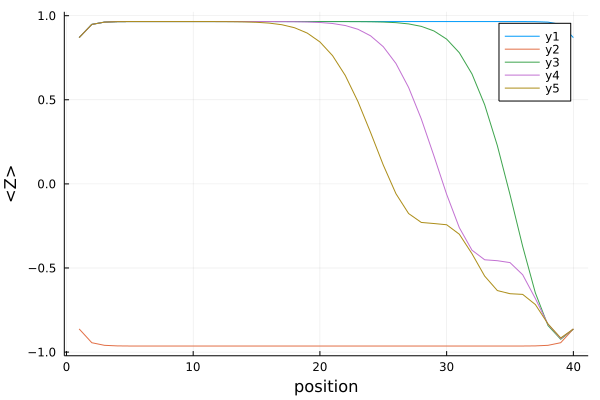

In [50]:
plot(mag, xlabel="position", ylabel = "<Z>")

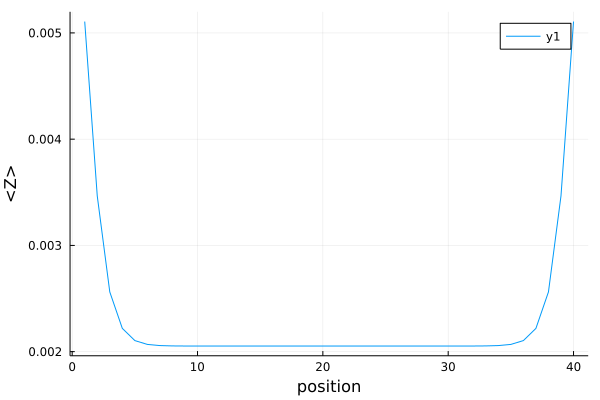

In [51]:
plot([magzero], xlabel="position", ylabel = "<Z>")

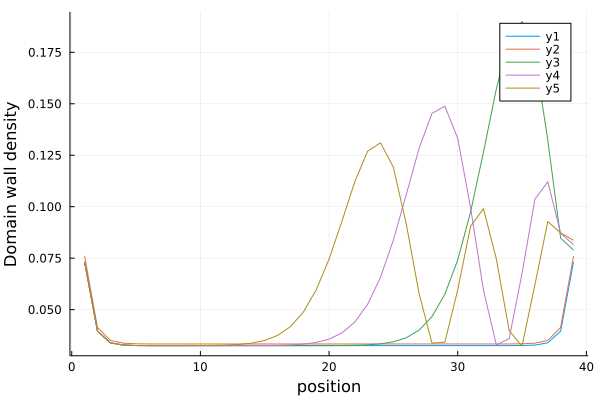

In [52]:
plot(domainwall, xlabel="position", ylabel = "Domain wall density")

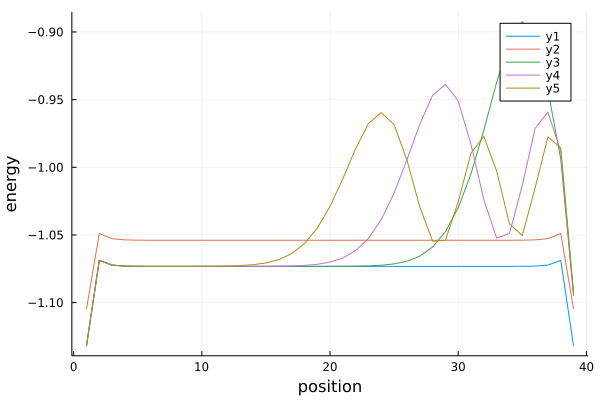

In [53]:
plot(es, xlabel="position", ylabel = "energy")

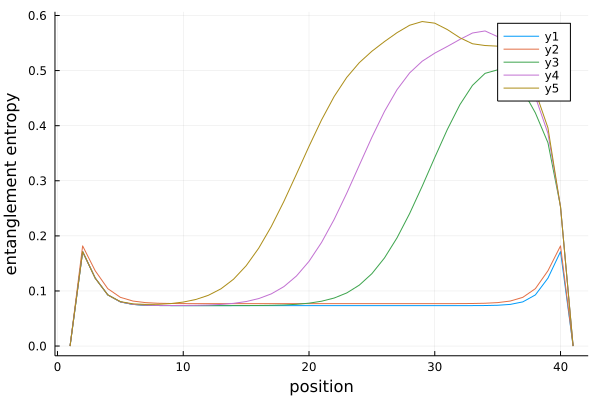

In [54]:
plot(real.(entropy), xlabel="position", ylabel = "entanglement entropy")